# Text Mining
### Análisis de Sentimientos en Descripciones de Productos para la Optimización de Estrategias de Marketing

La columna product_detail de nuestro dataset contiene descripciones de los productos que se venden en Maven Coffee. Con Text Mining, se puede extraer información valiosa  para orientar las decisiones sobre qué productos promocionar o cómo describir nuevos productos lo que puede hacer la diferencia en la fidelización y atracción de clientes.

El objetivo es crear una presentación de productos más atractiva mediante el uso de los resultados del análisis de sentimientos para modificar las descripciones. Este enfoque no solo mejora la experiencia del cliente, sino que también alinea el lenguaje con los objetivos estratégicos de marketing, aumentando potencialmente las ventas.

In [ ]:
# Descomentar e instalar de no haberlo hecho ya.
# !pip install wordcloud
# !pip install textblob

In [1]:
# Importamos librerías necesarias para trabajar
import pandas as pd
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
data = pd.read_csv("./dataset/coffee-shop-sales-revenue.csv", delimiter='|')

# Sentimiento

El siguiente gráfico proporciona una visión general del tono de las descripciones usando un algoritmo que determina si una palabra es positiva, negativa o neutral a través de una técnica llamada análisis de sentimientos. 

El algoritmo usa una combinación de diccionarios que asocian palabras comunes con emociones y asigna una puntuación de polaridad a cada palabra, promediando luego estas puntuaciones para obtener el sentimiento general.

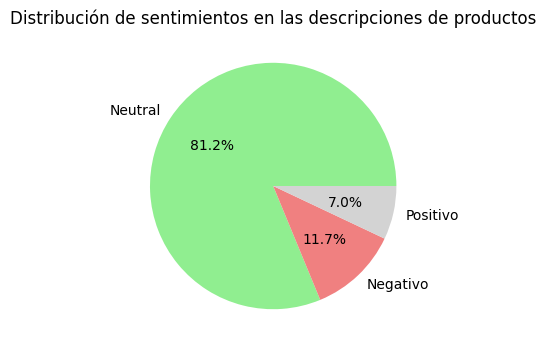

In [3]:
# Calcular polaridad (sentimiento) de cada descripción
data['sentiment'] = data['product_detail'].apply(lambda x: TextBlob(x).sentiment.polarity)
sentiment_counts = data['sentiment'].apply(lambda x: 'Positivo' if x > 0 else ('Negativo' if x < 0 else 'Neutral')).value_counts()

# Graficar
plt.figure(figsize=(15, 4))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgrey'])
plt.title("Distribución de sentimientos en las descripciones de productos")
plt.show()

### Recomendaciones de Marketing

La gran mayoría de las descripciones no expresa emociones fuertes (81.2%), son principalmente informativas o descriptivas. Esto es común cuando se detallan características objetivas del producto sin intentar persuadir al cliente emocionalmente.

- **Positivas (7.0%)**: Maximizar los elementos positivos y así mejorar la percepción del producto en los clientes.

- **Negativas (11.7%)**: Eliminar cualquier término que pueda disuadir al cliente.

# Polaridad del Sentimiento

Este gráfico de polaridad mide qué tan positivo o negativo es el lenguaje utilizado en el texto donde -1 indica un sentimiento muy negativo, 0 es neutral, y 1 es muy positivo.

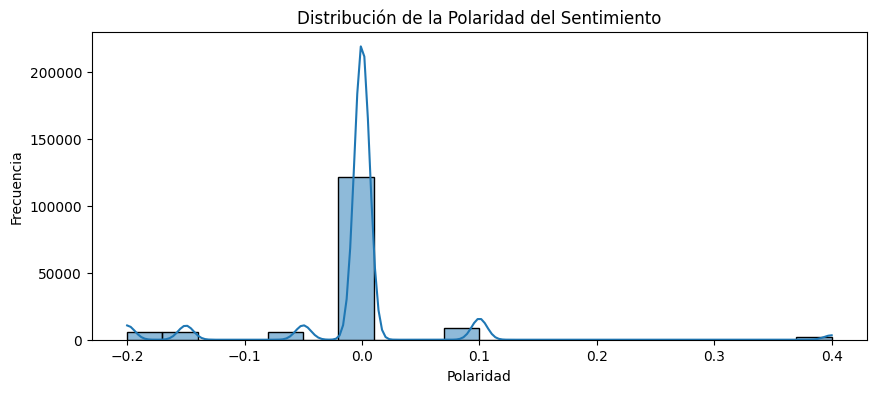

In [4]:
# Calcular polaridad de cada descripción
data['polarity'] = data['product_detail'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Histograma de polaridad
plt.figure(figsize=(10, 4))
sns.histplot(data['polarity'], kde=True, bins=20)
plt.title('Distribución de la Polaridad del Sentimiento')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()

### Recomendaciones de Marketing

La mayoría de las descripciones de productos tienen una polaridad cercana a cero, lo que indica que el lenguaje utilizado es mayormente neutral sin utilizar lenguaje cargado emocionalmente.

- **Positiva**: Replicar el lenguaje que utilizado en ejemplos de polaridad positiva en otros productos para crear una conexión emocional con los clientes.
  
- **Negativa**: Incorporar palabras que generen una percepción más positiva en productos con polaridad negativa o neutral para aumentar su atractivo.

# Subjetividad del Sentimiento
La subjetividad es una medida que va de 0 a 1, donde 0 representa contenido totalmente objetivo y 1 representa contenido completamente subjetivo. Este análisis permite comprender cómo es percibido el contenido actual y, si es necesario, modificar las descripciones para hacerlas más atractivas o persuasivas, alineándose con la estrategia de la marca y los intereses del cliente.

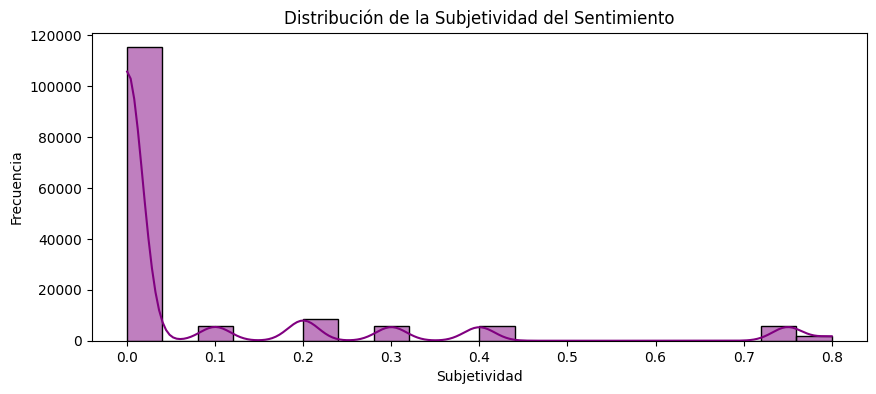

In [5]:
# Calcular subjetividad de cada descripción
data['subjectivity'] = data['product_detail'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Histograma de subjetividad
plt.figure(figsize=(10, 4))
sns.histplot(data['subjectivity'], kde=True, bins=20, color="purple")
plt.title('Distribución de la Subjetividad del Sentimiento')
plt.xlabel('Subjetividad')
plt.ylabel('Frecuencia')
plt.show()

### Recomendaciones de Marketing

Depende de la sucursal.

- **Baja**: En sucursales que apuntan a un público que valora experiencias agregar términos que apelen a los sentimientos del consumidor (por ejemplo, "delicioso", "exclusivo", "aromático") para conectar emocionalmente con el cliente.
  
- **Alta**: En sucursales que apuntan a un público más práctico se debe optar por un tono menos subjetivo, es decir, objetivo y directo.

# Nube de Palabras Positivas

Este gráfico ayuda a visualizar de manera clara cuáles palabras y atributos son mejor recibidos en las descripciones de productos. Las palabras que aparecen en un tamaño mayor son las que se repiten con más frecuencia, destacando términos clave que probablemente contribuyan a la percepción positiva de los productos.

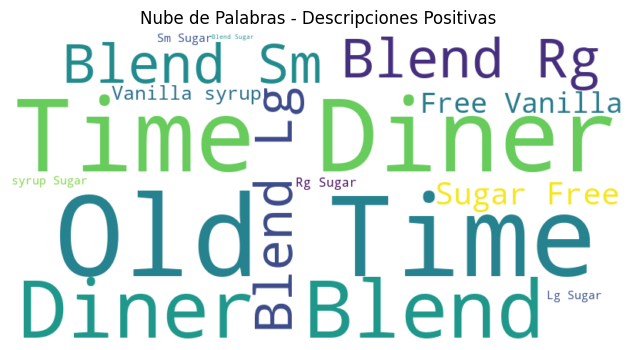

In [6]:
# Filtrar las descripciones con polaridad positiva
positive_text = ' '.join(data[data['polarity'] > 0]['product_detail'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(15, 4))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Descripciones Positivas')
plt.show()

### Recomendaciones de Marketing

Este análisis de las palabras más comunes en descripciones positivas puede ser útil para:

- **Emoción**: Adaptar otras descripciones de productos para incluir Ttrminos como "Old," "Time," "Diner," y "Blend". Estos términos pueden estar asociados con una sensación de nostalgia, tradición o autenticidad, características que a menudo generan una respuesta positiva en los clientes.

- **Términos Específicos de Sabor y Atributos**: Enfatizar palabras como "Vanilla" y "Sugar Free" porque estos sabores o características son bien recibidos. La mención de "Vanilla" sugiere una preferencia por este sabor, mientras que "Sugar Free" podría atraer a consumidores preocupados por la salud.

# Nube de Palabras Negativas

Este gráfico muestra los términos más comunes en las descripciones de productos que han sido clasificadas con un sentimiento negativo. Las palabras con un tamaño mayor indican una mayor frecuencia en estas descripciones, ayudando a identificar los términos que podrían estar asociados con percepciones menos favorables.

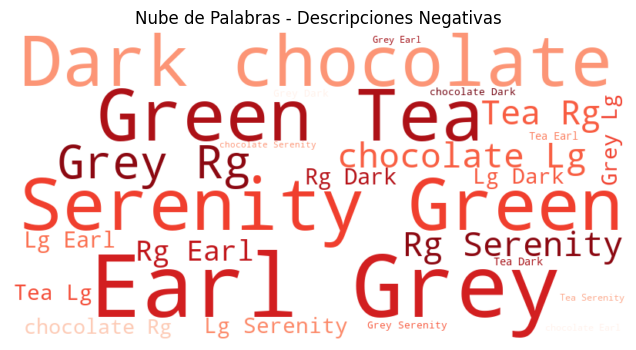

In [7]:
# Filtrar las descripciones con polaridad negativa
negative_text = ' '.join(data[data['polarity'] < 0]['product_detail'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(15, 4))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Descripciones Negativas')
plt.show()

### Recomendaciones de Marketing

Este análisis permite al equipo de marketing reformular descripciones:

Las combinaciones "Earl Grey" y "Serenity Green" podrían indicar que estos sabores específicos no generan tanto entusiasmo o tienen alguna característica percibida de manera negativa. El tono de las descripciones podría no estar alineado con las expectativas del cliente.